In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [45]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect,desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

## Inspecting data

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# inspect measurement
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
#inspect station

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [14]:
# explore data in measurment 
engine.execute("select * from measurement limit 5").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [15]:
engine.execute("select * from station limit 5").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [16]:
# Save references to each table 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Explore climate Analysis

In [18]:
#Measurement
Measurement_data = session.query(Measurement).first()
# take result as dictunary 
Measurement_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x938d550>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [19]:
Station_data = session.query(Measurement).first()
# take result as dictunary 
Station_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x938d550>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

## Main Dataframes from database

In [20]:
# Retrive data frame from Measurement tabel
Measurement_df = pd.read_sql("SELECT * FROM measurement", conn)
Measurement_df.head(10)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [21]:
# Retrive data frame from Measurement tabel
station_df = pd.read_sql("SELECT * FROM station", conn)
station_df.head(10)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


## Precipitation Analysis

<IPython.core.display.Javascript object>


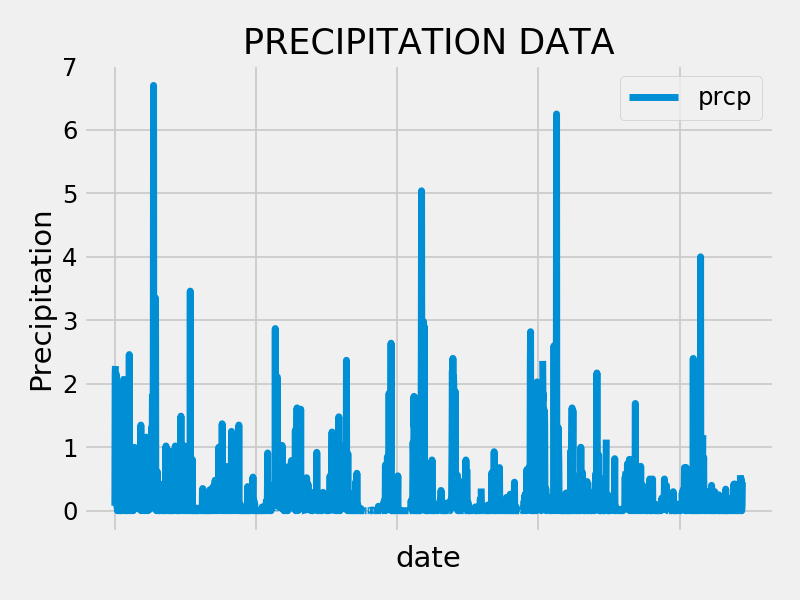

In [22]:

%matplotlib notebook
# last date of record for data
last_date_prcp= session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# one year before last record date : 
year_ago_prcp= dt.date(2017,8,23) - dt.timedelta(days=365)

# query to get results of precipitation  for one year ago :
stmt = session.query( Measurement.prcp,Measurement.date ).\
     filter(Measurement.date >year_ago_prcp).\
     order_by(Measurement.date).statement
prcp_date = pd.read_sql_query(stmt, session.bind)
prcp_date.set_index('date', inplace=True)

#plotting the Precipitation by date 
ppt_plot = prcp_date.plot(grid=True,title="PRECIPITATION DATA")
plt.ylabel("Precipitation")
plt.tight_layout()
plt.show()



### Describe data frame: prcp_date

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_date.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
# How many stations are available in this dataset?
station_count= session.query(Measurement.station ).group_by(Measurement.station ).count()
print(f"There are {station_count} available in dataset")

There are 9 available in dataset


In [25]:
# What are the most active stations?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# data frame of most active satition
query = "select Measurement.station, count(Measurement.tobs) as 'Temp observations'\
        from Measurement\
        group by Measurement.station\
        order by count(Measurement.tobs) desc"
active_stations = pd.read_sql(query,engine)
active_stations
      

,station,Temp observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

result=session.query(Measurement.station,func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()
result[0]

('USC00519281', 54.0, 85.0, 71.66378066378067)

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
max_temp= session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station=="USC00519281").all()
min_temp=session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station=="USC00519281").all()
avg_temp=session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station=="USC00519281").all()
print(f" Most active station: the highest temperature: {max_temp}, lowest temperature: {min_temp}, average temperature: {avg_temp}")

 Most active station: the highest temperature: [(85.0,)], lowest temperature: [(54.0,)], average temperature: [(71.66378066378067,)]


In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

stmt = session.query(Measurement.date, Measurement.tobs ).\
     filter(Measurement.date >year_ago_prcp).\
     filter(Measurement.station=="USC00519281").\
     order_by(Measurement.date).statement

active_station = pd.read_sql_query(stmt, session.bind)
active_station.set_index('date', inplace=True)
active_station.head(10)


,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
2016-08-29,78.0
2016-08-30,77.0
2016-08-31,78.0
2016-09-01,80.0


<IPython.core.display.Javascript object>


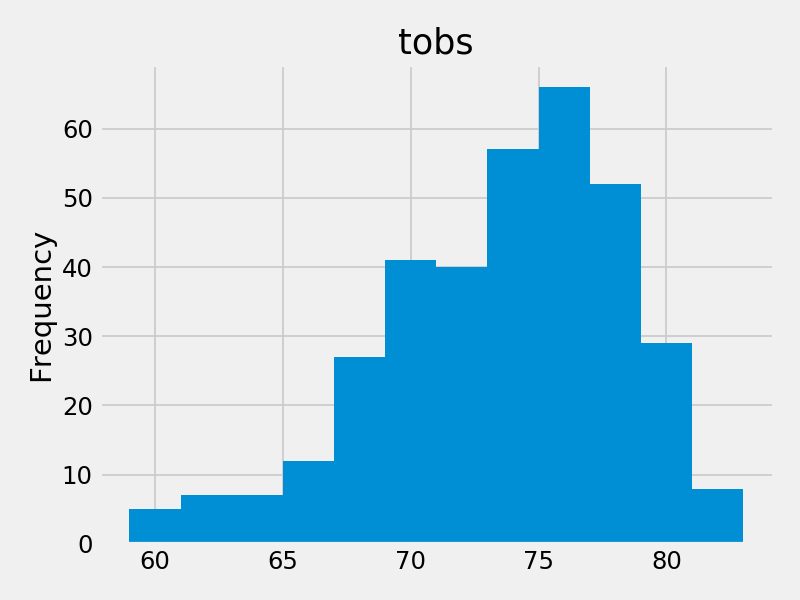

In [30]:
histogram=active_station.hist(column='tobs', bins=12)
# plt.title("Active station Temperature Frequency ")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [31]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
Hawaii=calc_temps('2012-02-28', '2012-03-05')
print(" Analysis for My Hawaii trip date:'2017-01-01', '2017-01-12'")
print("-"*50)
print(f" The Minimum temperatures is {Hawaii[0][0]}.")
print(f" The Maximum temperatures is {Hawaii[0][2]}.")
print(f" The Avarag temperatures is {Hawaii[0][1]}.")
print(calc_temps('2012-02-28', '2012-03-05'))

 Analysis for My Hawaii trip date:'2017-01-01', '2017-01-12'
--------------------------------------------------
 The Minimum temperatures is 62.0.
 The Maximum temperatures is 74.0.
 The Avarag temperatures is 69.57142857142857.
[(62.0, 69.57142857142857, 74.0)]


In [33]:
# print(last_date_prcp)
# print(year_ago_prcp)

In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print("Max Date: " + str(last_date_prcp))
print("Last year Date: " + str(year_ago_prcp))
results3 = calc_temps('2016-08-23', '2017-08-23')
print(results3)




Max Date: ('2017-08-23',)
Last year Date: 2016-08-23
[(58.0, 74.59058295964125, 87.0)]


In [34]:

# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
avg_temp = results3[0][1]
max_temp = results3[0][0]
min_temp = results3[0][2]
yerrcalc = max_temp-min_temp
print("avg_temp: " + str(avg_temp))
print("yerrcalc: " + str(yerrcalc))



avg_temp: 74.59058295964125
yerrcalc: -29.0


<IPython.core.display.Javascript object>


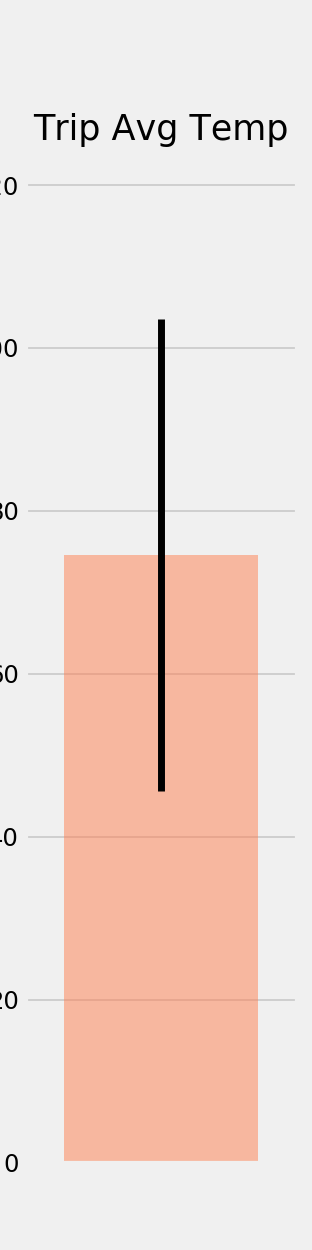

In [54]:
fig1 = plt.figure()
Trip=plt.bar(np.arange(1), avg_temp, color="coral", yerr=yerrcalc, alpha=0.5)
plt.title("Trip Avg Temp")
plt.margins(0.2, 0.2)
plt.xticks([])
plt.ylabel("Temp(F)")
plt.rcParams["figure.figsize"] =[2.5,8]
plt.show()


In [46]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
print("Last year date: " + str('2016-08-23'))
lastyear="2016-08-23"
# print("Last year date: " + str(lastyear))
sql_station_rain = session.query(Measurement.station, func.sum(Measurement.prcp).label("precipitation_amount")).\
    filter(Measurement.date >= lastyear).group_by(Measurement.station).order_by(desc("precipitation_amount")).statement
stations_rain = pd.read_sql_query(sql_station_rain, session.bind)

stations = pd.read_sql_query(session.query(Station).statement, session.bind)

stations_rain_final = pd.merge(stations_rain, stations, on="station", how="inner")
stations_rain_final[["station","name","latitude","longitude", "elevation", "precipitation_amount"]]

Last year date: 2016-08-23


,station,name,latitude,longitude,elevation,precipitation_amount
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,147.81
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,70.03
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,48.51
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,38.01
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,33.24
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,16.09
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,4.59


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [47]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [50]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
def str_date(sdate):
    return dt.datetime.strptime(sdate, "%Y-%m-%d").date()
normals = []
# Set the start and end date of the trip
start_date = dt.datetime.strptime("2018-01-01", "%Y-%m-%d").date()
end_date = dt.datetime.strptime("2018-01-08", "%Y-%m-%d").date()

# Use the start and end date to create a range of dates
date_range = [start_date + dt.timedelta(days=x) for x in range(0, (end_date-start_date).days)]

# Stip off the year and save a list of %m-%d strings
date_range_normals = [dt.date.strftime(x, "%m-%d") for x in date_range]
# Loop through the list of %m-%d strings and calculate the normals for each date
[normals.append(daily_normals(x)[0]) for x in date_range_normals]
normals


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [51]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_result = pd.DataFrame(normals, columns=["tmin","tavg","tmax"])
trip_result["date"] = date_range
trip_result.set_index("date", inplace=True)
trip_result.head()

,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


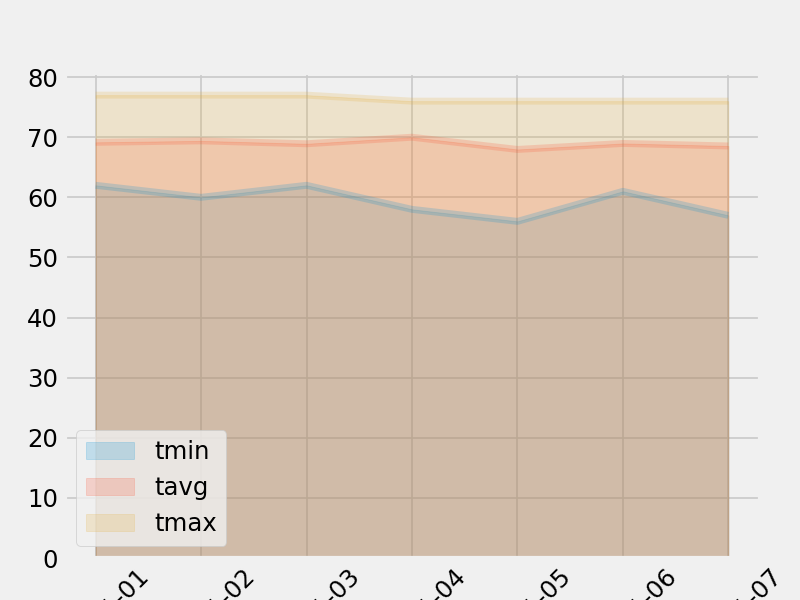

In [56]:

# Plot the daily normals as an area plot with `stacked=False`


trip_result.plot.area(alpha=0.2, stacked=False)
plt.xticks(rotation=45)
plt.show()
plt.rcParams["figure.figsize"] = [6.4, 4.8]

